## Exit surveys analysis

In [59]:
import pandas as pd
import numpy as np

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [4]:
dete_survey.head()

ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Central Office  Corporate Strategy and Peformance   
2            NaN      Central Office               Education Queensland   
3        Primary  Central Queensland                                NaN   
4            NaN          South East                                NaN   

     Employment Status  ...   Kept informed  Wellness programs  \
0  Permanent Full-time  ...               N                  N   
1  Permanent Full-time  ...               N                  N   
2  Permanent Full-time  ...               N                  N   
3  Permanent Full-time  ...               A                  N   
4  Permanent Full-time  ...               N                  A   

   Health & Safety  Gender          Age  Aboriginal  Torres Strait  South Sea  \
0                N    Male        56-60         NaN            NaN        NaN   
1                N    Male        56-60         NaN            NaN        NaN   
2                N    Male  61 or older         NaN            NaN        NaN   
3                A  Female        36-40         NaN            NaN        NaN   
4                M  Female  61 or older         NaN            NaN        NaN   

   Disability  NESB  
0         NaN   Yes  
1         NaN   NaN  
2         NaN   NaN  
3         NaN   NaN  
4         NaN   NaN  

[5 rows x 56 columns]

In [5]:
tafe_survey.head()

Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   
3                                -                                      -   
4                                -                                      -   

                                     ...                                     \
0                                    ...                                      
1                                    ...                                      
2                                    ...                                      
3                                    ...                                      
4                                    ...                                      

  Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?  \
0                                                Yes                                                            
1                                                Yes                                                            
2                                                Yes                                                            
3                                                Yes                                                            
4                                                Yes                                                            

  Workplace. Topic:Does your workplace promote and practice the principles of employment equity?  \
0                                                Yes                                               
1                                                Yes                                               
2                                                Yes                                               
3                                                Yes                                               
4                                                Yes  

In [6]:
dete_survey = pd.read_csv('dete_survey.csv',na_values='Not Stated')

In [7]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [8]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

In [9]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').str.strip().str.lower()

In [10]:
rename_columns = {'Record ID': 'id'
,'CESSATION YEAR': 'cease_date'
,'Reason for ceasing employment': 'separationtype'
,'Gender. What is your Gender?': 'gender'
,'CurrentAge. Current Age': 'age'
,'Employment Type. Employment Type': 'employment_status'
,'Classification. Classification': 'position'
,'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
,'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

In [11]:
tafe_survey_updated.rename(columns=rename_columns,inplace=True)

In [12]:
tafe_survey_updated.head()

id                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date    separationtype  \
0  Non-Delivery (corporate)      2010.0  Contract Expired   
1  Non-Delivery (corporate)      2010.0        Retirement   
2       Delivery (teaching)      2010.0        Retirement   
3  Non-Delivery (corporate)      2010.0       Resignation   
4       Delivery (teaching)      2010.0       Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   
3                                -                                      -   
4                                -                                      -   

      ...      Contributing Factors. Study Contributing Factors. Travel  \
0     ...                              NaN                          NaN   
1     ...                                -                       Travel   
2     ...                                -                            -   
3     ...                                -                       Travel   
4     ...                                -                            -   

  Contributing Factors. Other Contributing Factors. NONE  gender     age  \
0                         NaN                        NaN  Female  26  30   
1                           -                          -     NaN     NaN   
2                           -                       NONE     NaN     NaN   
3                           -                          -     NaN     NaN   
4                           -                          -    Male  41  45   

     employment_status                 position institute_service role_service  
0  Temporary Full-time      Administration (AO)               1-2          1-2  
1                  NaN                      NaN               NaN          NaN  
2                  NaN                      NaN               NaN          NaN  
3                  NaN                      NaN               NaN          NaN  
4  Permanent Full-time  Teacher (including LVT)               3-4          3-4  

[5 rows x 23 columns]

In [13]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [14]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [17]:
dete_resignations_TF = dete_survey_updated.copy()['separationtype'].str.contains('Resignation')
dete_resignations = dete_survey_updated[dete_resignations_TF]

In [18]:
dete_resignations.head()

id                        separationtype cease_date  dete_start_date  \
3    4             Resignation-Other reasons    05/2012           2005.0   
5    6             Resignation-Other reasons    05/2012           1994.0   
8    9             Resignation-Other reasons    07/2012           2009.0   
9   10            Resignation-Other employer       2012           1997.0   
11  12  Resignation-Move overseas/interstate       2012           2009.0   

    role_start_date          position classification                region  \
3            2006.0           Teacher        Primary    Central Queensland   
5            1997.0  Guidance Officer            NaN        Central Office   
8            2009.0           Teacher      Secondary      North Queensland   
9            2008.0      Teacher Aide            NaN                   NaN   
11           2009.0           Teacher      Secondary  Far North Queensland   

           business_unit    employment_status  ...   work_life_balance  \
3                    NaN  Permanent Full-time  ...               False   
5   Education Queensland  Permanent Full-time  ...               False   
8                    NaN  Permanent Full-time  ...               False   
9                    NaN  Permanent Part-time  ...               False   
11                   NaN  Permanent Full-time  ...               False   

    workload  none_of_the_above  gender    age  aboriginal  torres_strait  \
3      False              False  Female  36-40         NaN            NaN   
5      False              False  Female  41-45         NaN            NaN   
8      False              False  Female  31-35         NaN            NaN   
9      False              False  Female  46-50         NaN            NaN   
11     False              False    Male  31-35         NaN            NaN   

    south_sea  disability  nesb  
3         NaN         NaN   NaN  
5         NaN         NaN   NaN  
8         NaN         NaN   NaN  
9         NaN         NaN   NaN  
11        NaN         NaN   NaN  

[5 rows x 35 columns]

In [24]:
tafe_resignations_TF = tafe_survey_updated['separationtype']=='Resignation'
tafe_resignations = tafe_survey_updated[tafe_resignations_TF]

In [25]:
tafe_resignations.head()

id                              Institute  \
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   
5  6.341475e+17  Southern Queensland Institute of TAFE   
6  6.341520e+17         Barrier Reef Institute of TAFE   
7  6.341537e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date separationtype  \
3  Non-Delivery (corporate)      2010.0    Resignation   
4       Delivery (teaching)      2010.0    Resignation   
5       Delivery (teaching)      2010.0    Resignation   
6  Non-Delivery (corporate)      2010.0    Resignation   
7       Delivery (teaching)      2010.0    Resignation   

  Contributing Factors. Career Move - Public Sector   \
3                                                  -   
4                                                  -   
5                                                  -   
6                                                  -   
7                                                  -   

  Contributing Factors. Career Move - Private Sector   \
3                                                  -    
4                       Career Move - Private Sector    
5                                                  -    
6                       Career Move - Private Sector    
7                                                  -    

  Contributing Factors. Career Move - Self-employment  \
3                                                  -    
4                                                  -    
5                                                  -    
6                                                  -    
7                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
3                                -                                      -   
4                                -                                      -   
5                                -                                      -   
6                                -                       Maternity/Family   
7                                -                                      -   

      ...      Contributing Factors. Study Contributing Factors. Travel  \
3     ...                                -                       Travel   
4     ...                                -                            -   
5     ...                                -                            -   
6     ...                                -                            -   
7     ...                                -                            -   

  Contributing Factors. Other Contributing Factors. NONE  gender  \
3                           -                          -     NaN   
4                           -                          -    Male   
5                       Other                          -  Female   
6                       Other                          -    Male   
7                       Other                          -    Male   

             age    employment_status                 position  \
3            NaN                  NaN                      NaN   
4         41  45  Permanent Full-time  Teacher (including LVT)   
5    56 or older      Contract/casual  Teacher (including LVT)   
6  20 or younger  Temporary Full-time      Administration (AO)   
7         46  50  Permanent Full-time  Teacher (including LVT)   

  institute_service role_service  
3               NaN          NaN  
4               3-4          3-4  
5              7-10         7-10  
6               3-4          3-4  
7               3-4          3-4  

[5 rows x 23 columns]

In [26]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2006      1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

In [28]:
pattern = r"([2][0-9][0-9][0-9])"
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [34]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
dete_resignations.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


id                        separationtype  cease_date  dete_start_date  \
3    4             Resignation-Other reasons      2012.0           2005.0   
5    6             Resignation-Other reasons      2012.0           1994.0   
8    9             Resignation-Other reasons      2012.0           2009.0   
9   10            Resignation-Other employer      2012.0           1997.0   
11  12  Resignation-Move overseas/interstate      2012.0           2009.0   

    role_start_date          position classification                region  \
3            2006.0           Teacher        Primary    Central Queensland   
5            1997.0  Guidance Officer            NaN        Central Office   
8            2009.0           Teacher      Secondary      North Queensland   
9            2008.0      Teacher Aide            NaN                   NaN   
11           2009.0           Teacher      Secondary  Far North Queensland   

           business_unit    employment_status  ...   work_life_balance  \
3                    NaN  Permanent Full-time  ...               False   
5   Education Queensland  Permanent Full-time  ...               False   
8                    NaN  Permanent Full-time  ...               False   
9                    NaN  Permanent Part-time  ...               False   
11                   NaN  Permanent Full-time  ...               False   

    workload  none_of_the_above  gender    age  aboriginal  torres_strait  \
3      False              False  Female  36-40         NaN            NaN   
5      False              False  Female  41-45         NaN            NaN   
8      False              False  Female  31-35         NaN            NaN   
9      False              False  Female  46-50         NaN            NaN   
11     False              False    Male  31-35         NaN            NaN   

    south_sea  disability  nesb  
3         NaN         NaN   NaN  
5         NaN         NaN   NaN  
8         NaN         NaN   NaN  
9         NaN         NaN   NaN  
11        NaN         NaN   NaN  

[5 rows x 35 columns]

In [35]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [38]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [37]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [49]:
tafe_resignations.boxplot(column=['cease_date'])

In [50]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
id                                     311 non-null int64
separationtype                         311 non-null object
cease_date                             300 non-null float64
dete_start_date                        283 non-null float64
role_start_date                        271 non-null float64
position                               308 non-null object
classification                         161 non-null object
region                                 265 non-null object
business_unit                          32 non-null object
employment_status                      307 non-null object
career_move_to_public_sector           311 non-null bool
career_move_to_private_sector          311 non-null bool
interpersonal_conflicts                311 non-null bool
job_dissatisfaction                    311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
physical_work_envir

In [52]:
dete_resignations['institute_service'] = dete_resignations.copy()['cease_date'] - dete_resignations.copy()['dete_start_date']

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [53]:
dete_resignations.head()

id                        separationtype  cease_date  dete_start_date  \
3    4             Resignation-Other reasons      2012.0           2005.0   
5    6             Resignation-Other reasons      2012.0           1994.0   
8    9             Resignation-Other reasons      2012.0           2009.0   
9   10            Resignation-Other employer      2012.0           1997.0   
11  12  Resignation-Move overseas/interstate      2012.0           2009.0   

    role_start_date          position classification                region  \
3            2006.0           Teacher        Primary    Central Queensland   
5            1997.0  Guidance Officer            NaN        Central Office   
8            2009.0           Teacher      Secondary      North Queensland   
9            2008.0      Teacher Aide            NaN                   NaN   
11           2009.0           Teacher      Secondary  Far North Queensland   

           business_unit    employment_status        ...          workload  \
3                    NaN  Permanent Full-time        ...             False   
5   Education Queensland  Permanent Full-time        ...             False   
8                    NaN  Permanent Full-time        ...             False   
9                    NaN  Permanent Part-time        ...             False   
11                   NaN  Permanent Full-time        ...             False   

    none_of_the_above  gender    age  aboriginal  torres_strait  south_sea  \
3               False  Female  36-40         NaN            NaN        NaN   
5               False  Female  41-45         NaN            NaN        NaN   
8               False  Female  31-35         NaN            NaN        NaN   
9               False  Female  46-50         NaN            NaN        NaN   
11              False    Male  31-35         NaN            NaN        NaN   

    disability  nesb  institute_service  
3          NaN   NaN                7.0  
5          NaN   NaN               18.0  
8          NaN   NaN                3.0  
9          NaN   NaN               15.0  
11         NaN   NaN                3.0  

[5 rows x 36 columns]

In [54]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
id                                                     340 non-null float64
Institute                                              340 non-null object
WorkArea                                               340 non-null object
cease_date                                             335 non-null float64
separationtype                                         340 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null 

In [56]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [57]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [60]:
def upd_col(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

In [61]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Job Dissatisfaction','Contributing Factors. Dissatisfaction']].applymap(upd_col).any(axis=1,skipna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [62]:
tafe_resignations.head()

id                              Institute  \
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   
5  6.341475e+17  Southern Queensland Institute of TAFE   
6  6.341520e+17         Barrier Reef Institute of TAFE   
7  6.341537e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date separationtype  \
3  Non-Delivery (corporate)      2010.0    Resignation   
4       Delivery (teaching)      2010.0    Resignation   
5       Delivery (teaching)      2010.0    Resignation   
6  Non-Delivery (corporate)      2010.0    Resignation   
7       Delivery (teaching)      2010.0    Resignation   

  Contributing Factors. Career Move - Public Sector   \
3                                                  -   
4                                                  -   
5                                                  -   
6                                                  -   
7                                                  -   

  Contributing Factors. Career Move - Private Sector   \
3                                                  -    
4                       Career Move - Private Sector    
5                                                  -    
6                       Career Move - Private Sector    
7                                                  -    

  Contributing Factors. Career Move - Self-employment  \
3                                                  -    
4                                                  -    
5                                                  -    
6                                                  -    
7                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
3                                -                                      -   
4                                -                                      -   
5                                -                                      -   
6                                -                       Maternity/Family   
7                                -                                      -   

      ...      Contributing Factors. Travel Contributing Factors. Other  \
3     ...                            Travel                           -   
4     ...                                 -                           -   
5     ...                                 -                       Other   
6     ...                                 -                       Other   
7     ...                                 -                       Other   

  Contributing Factors. NONE  gender            age    employment_status  \
3                          -     NaN            NaN                  NaN   
4                          -    Male         41  45  Permanent Full-time   
5                          -  Female    56 or older      Contract/casual   
6                          -    Male  20 or younger  Temporary Full-time   
7                          -    Male         46  50  Permanent Full-time   

                  position institute_service role_service dissatisfied  
3                      NaN               NaN          NaN        False  
4  Teacher (including LVT)               3-4          3-4        False  
5  Teacher (including LVT)              7-10         7-10        False  
6      Administration (AO)               3-4          3-4        False  
7  Teacher (including LVT)               3-4          3-4        False  

[5 rows x 24 columns]

In [66]:
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [64]:
tafe_resignations_up = tafe_resignations.copy()

In [65]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [67]:
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [68]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [73]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [74]:
combined.head()

Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                NaN    
2                                                NaN    
3                                                NaN    
4                                                NaN    

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                NaN    
2                                                NaN    
3                                                NaN    
4                                                NaN    

  Contributing Factors. Dissatisfaction Contributing Factors. Ill Health  \
0                                   NaN                              NaN   
1                                   NaN                              NaN   
2                                   NaN                              NaN   
3                                   NaN                              NaN   
4                                   NaN                              NaN   

  Contributing Factors. Interpersonal Conflict  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

  Contributing Factors. Job Dissatisfaction  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

  Contributing Factors. Maternity/Family Contributing Factors. NONE  \
0                                    NaN                        NaN   
1                                    NaN                        NaN   
2                                    NaN                        NaN   
3                                    NaN                        NaN   
4                                    NaN                        NaN   

  Contributing Factors. Other    ...    role_service role_start_date  \
0                         NaN    ...             NaN          2006.0   
1                         NaN    ...             NaN          1997.0   
2                         NaN    ...             NaN          2009.0   
3                         NaN    ...             NaN          2008.0   
4                         NaN    ...             NaN          2009.0   

                         separationtype south_sea study/travel torres_strait  \
0             Resignation-Other reasons       NaN        False           NaN   
1             Resignation-Other reasons       NaN        False           NaN   
2             Resignation-Other reasons       NaN        False           NaN   
3            Resignation-Other employer       NaN        False           NaN   
4  Resignation-Move overseas/interstate       NaN        False           NaN   

  traumatic_incident work_life_balance work_location  workload  
0              False             False         False     False  
1              False             False         False     False  
2              False             False         False     False  
3              False             False         False     False  
4              False             False         False     False  

[5 rows x 53 columns]

In [76]:
combined_updated = combined.dropna(thresh=500, axis = 1).copy()

In [77]:
combined_updated.head()

age  cease_date dissatisfied    employment_status  gender    id  \
0  36-40      2012.0        False  Permanent Full-time  Female   4.0   
1  41-45      2012.0         True  Permanent Full-time  Female   6.0   
2  31-35      2012.0        False  Permanent Full-time  Female   9.0   
3  46-50      2012.0         True  Permanent Part-time  Female  10.0   
4  31-35      2012.0        False  Permanent Full-time    Male  12.0   

  institute institute_service          position  \
0      DETE                 7           Teacher   
1      DETE                18  Guidance Officer   
2      DETE                 3           Teacher   
3      DETE                15      Teacher Aide   
4      DETE                 3           Teacher   

                         separationtype  
0             Resignation-Other reasons  
1             Resignation-Other reasons  
2             Resignation-Other reasons  
3            Resignation-Other employer  
4  Resignation-Move overseas/interstate

In [79]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


In [89]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str).str.extract(r'(\d+)').astype(float)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [90]:
combined_updated['institute_service'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [95]:
def upd_cat(x):
    if x < 3:
        return 'New'
    elif x >=3 and x<7:
        return 'Experienced'
    elif x >=7 and x <11:
        return 'Established'
    elif x >= 11:
        return 'Veteran'
    elif pd.isnull(x):
        return np.nan

In [96]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(upd_cat)

In [97]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [98]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [104]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [105]:
pctg = combined_updated.pivot_table(values='dissatisfied', index='service_cat')

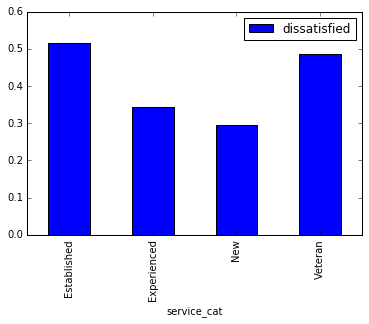

In [108]:
%matplotlib inline
pctg.plot(kind='bar')

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.